# CSC413 Assignment 2: American Sign Language

**Deadline**: March 9, 2023 by 6pm

**Submission**: Compile and submit a PDF report containing your code, outputs,
and your written solutions. Do not use screenshots and images to present
textual code/output (other than legible, hand-written answer).
You may export the completed notebook on Google Colab, but if you do so
**it is your responsibly to make sure that your code and answers do not get cut off**.

**Late Submission**: Please see the syllabus for the late submission criteria.

**Working with a partner**: You may work with a partner for this assignment.
If you decide to work with a partner, please create your group on Markus by
the deadline, even if you intend to use grace tokens. Markus does not allow
you to create groups past the deadline, even if you have grace tokens remaining.

[American Sign Language (ASL)](https://en.wikipedia.org/wiki/American_Sign_Language)
is a complete, complex language that employs signs made by 
moving the hands combined with facial expressions and postures of the body. 
It is the primary language of many North Americans who are deaf and is one of several 
communication options used by people who are deaf or hard-of-hearing.

The hand gestures representing English alphabets are shown below.

In this assignment, we will 
classify a subset of these hand gesture images using convolutional neural networks.
Specifically, given an image of a hand showing one of the letters A-I, we want to detect
which letter is being represented.

We will explore several convolutional architectures.
While we will give you a tiny
big of starter code to help make data processing a bit easier,
you'll have a chance to build your neural network all by yourself!

You may modify the starter code as you see fit, including changing the signatures of
functions and adding/removing helper functions. However, please make sure that your
TA can understand what you are doing and why.

In [10]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models, torchvision.datasets

%matplotlib inline

## Question 1. Data

If you are using your own machine, download the data from the course website on Quercus.

If you are using Google Colab, download the data set to your Google Drive by going to
the link [https://drive.google.com/drive/folders/1aPL24P610NHLvt9exk6-B7SzGk3R8Q48?usp=sharing](https://drive.google.com/drive/folders/1aPL24P610NHLvt9exk6-B7SzGk3R8Q48?usp=sharing)
and selecting "Add to My Drive".
This is faster than downloading the data from the course website.

Then, mount Google Drive from your Google Colab notebook:

In [11]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


The file structure we use is intentional,
so that we can use `torchvision.datasets.ImageFolder`
to help load our data and create labels.

In [12]:
train_path = "/content/gdrive/My Drive/Colab Notebooks/CSC413/A2/train/"
valid_path = "/content/gdrive/My Drive/Colab Notebooks/CSC413/A2/valid/"
test_path = "/content/gdrive/My Drive/Colab Notebooks/CSC413/A2/test/"

train_data = torchvision.datasets.ImageFolder(train_path, transform=torchvision.transforms.ToTensor())
valid_data = torchvision.datasets.ImageFolder(valid_path, transform=torchvision.transforms.ToTensor())
test_data = torchvision.datasets.ImageFolder(test_path, transform=torchvision.transforms.ToTensor())

### Part (a) -- 2 pts

Read up on what `torchvision.datasets.ImageFolder` does for us here
[https://pytorch.org/vision/stable/datasets.html#torchvision.datasets.ImageFolder](https://pytorch.org/vision/stable/datasets.html#torchvision.datasets.ImageFolder)

We can iterate through the one training data point at a time like this:

In [13]:
for x, y in train_data:
    print(x.shape)
    print(y)
    break # uncomment if you'd like

torch.Size([3, 224, 224])
0


What do the variables `x` and `y` contain? What is the shape of our images?
What are our labels? How did PyTorch generate these labels from the folder structure?

Before answering this question, you will need to look at the folder structure
and look at some images in the data set.

In [14]:
# Your explanation goes here
# 
# What do the variables x and y contain?
# x contains the data from the input image.
# y contains the label for the corresponding image that x represent
# 
# What is the shape of our images?
# The shape of the image is 224 x 224, which means that x is a Tensor that has the size of 3 x 224 x 224, where 224 x 224
# is the shape of the image and the 3 corresponds to the 3 colors r, g, and b. The values range from 0 to 1, where 0 means that
# the intensity for that specific color(r, g, or b) is 0 at that specific position(on the 224 x 224 image).
# 
# What are our labels?
# The labels, y, have the values 0-8, where each label corresponds to a letter between A-I.
# 
# How did PyTorch generate these labels from the folder structure?
# PyTorch takes the folder names, assign a label to it, then assign the same label to all images under the same folder name.

### Part (b) -- 2 pts

We saw in the earlier tutorials that PyTorch has a utility to help us
create minibatches with our data. We can use the same DataLoader helper
here:

In [15]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=10, shuffle=True)

for x, y in train_loader:
    print(x.shape)
    print(y)
    break # uncomment if you'd like

torch.Size([10, 3, 224, 224])
tensor([3, 2, 4, 6, 0, 6, 1, 0, 3, 5])


What do the variables `x` and `y` contain? What are their shapes?
What data do they contain?

In [16]:
# Your explanation goes here
# 
# What do the variables x and y contain?
# x contains 10 random images from train_data.
# y contains the labels corresponding to those 10 images.
# 
# What are their shapes?
# x has the shape 10 x 3 x 224 x 224.
# y has the shape 10 x 1.
# 
# What data do they contain?
# x contains 10 images randomly sampled from the train_data, where an image has the shape 3 x 224 x 224. The values in
# the matrix range from 0-1, following the logic described in Q1a.
# y contains the label for each image, where a label corresponds to an image in x. The range of the label is 0-8 as
# previously mentioned in Q1a.

### Part (c) -- 1 pts

How many images are there in the training, validation, and test sets?

In [17]:
# Your answer (and possibly code) goes here
print('Number of images in the training set: {} images'.format(len(train_data)))
print('Number of images in the validation set: {} images'.format(len(valid_data)))
print('Number of images in the test set: {} images'.format(len(test_data)))

Number of images in the training set: 733 images
Number of images in the validation set: 207 images
Number of images in the test set: 223 images


### Part (d) -- 3 pts

This dataset was generated by students in past machine learning courses, where
each student took several photos of themselves demonstrating the ASL hand gestures.
The file names of the images follow the following convention:
`<student-identifier>_<letter>_<img-count>.jpg`

When we split the data into training, validation, and test sets, we took care
to put photos taken by the same person in the same data set. In other words, if one of the
student's photo is in the training set, then other photos taken by the same student
will also be placed in the training set.

This way of separating the dataset into training, validation and test is more nuanced
than simply randomly splitting the photos into training/validation/test.

Explain why it is important to make sure that we split the photos into the
three datasets **by student**, so that photos from the same student are always in the
same set.

In [18]:
# Your answer goes here
# If the photos from the same student are split across different datasets(ie, in both training and validation),
# there are other factors such as finger shape, skin tone, nail shape, and many more that may influence and create undetectable 
# bias in our model. By undetectable, it means that when using the validation and test set, the biases may influence the prediction
# and cause the prediction to be "accidentally" correct due to the factors not related to the hand sign. This is because if the model 
# learned to classify the images with the training set and the "noise" factors influence the prediction in some way, when the
# same factors are present in other images from validation and test sets, these factors can lead to correct predictions, instead
# of the correct hand sign leading to the correct predictions. This means that the model is making some of the predictions based on the
# noise instead of the actual hand sign and we wouldn't be able to recognize this when calculating the validation and test accuracy.
# 
# Additionally, if the photos from the same student are split across different datasets, there is a potential for the data leakage.
# For instance, same student's pictures can appear both in training and test folders and the model can unintentionally try to recognize the
# student himself instead of the gestures. Such performance of the model would be poor and inaccurate as the model should not be trained and tested on the same data.
# By splitting the photos into the three datasets by student so that photos from the same student are always in the same set, we can better 
# recreate real-world scenario where a model encounters a new person's hand gesture that it has never seen before.

## Question 2. Model Building

#### Part (a) Convolutional Network - 5 pt

Build a convolutional neural network model that takes the (224x224 RGB) image as input, and predicts
the letter. Your model should be a subclass of `nn.Module`. 
You may want to review the Colab notebook demo from week 6 lectures. There is a small convolutional
neural network included in the notebook.

Here are some rules of thumb when determining your convolutional neural network architecture:

- Nowadays, people prefer small kernel sizes (e.g. 3x3 or 5x5), with many convolutional layers
  (we suggest 3-4 to start).
- Use a downsampling operation after (or with) each convolution layer
- In a typical convolutional neural network architectures, every time we downsample, we double the
  number of features (channels). This is so that we don't lose too much information in each layer.
  You may wish to make the number of output channels in your first convolutional layer a variable,
  and double this value in every subsequent convolutions.
- Typical CNNS will have a few (1-3) fully-connected layers as the final layers.

Explain your choice of neural network architecture: how many layers did you choose?
What types of layers did you use? Were they fully-connected or convolutional? What about other
decisions like pooling layers, activation functions, number of channels / hidden units.

Do not use dropout or batch normalization in this architecture.

**Explanation:**

Convolution layers are followed by Relu and Maxpooling in order to introduce non-linearity and downsampling of data. This helps to prevent overfitting and improves model accuracy. In our model we have 4 convolution layers where each layer is followed by Relu and Maxpooling. We decided to go with this particular amount of layers because we want our model to learn enough features from the pictures provided and we think that 4 would be slightly better than 3.

We decided to go with initial number of 16 channels. We picked this number in order to allow our model to learn enough of feature maps but at the same time we kept this number not too large in order to not overfit the model.

We decided to go with 1 hidden layer with 100 hidden units, such number was chosen to not overfit the model and at the same time allow it to learn enough of complex relationships between inputs and outputs.

After 4 layers of convolutions, Relu and Maxpooling we decided to go with two fully connected linear layers because by adding more of such layers, the model can learn more complex relationships and produce final output for classification. Additionally, after fully connected layer 1, we have another Relu function to introduce non-linearity between fully connected layer 1 and 2.

We chose to use ReLU for our choice of activation function because we want to introduce non-linearity and ReLU was an efficient option.

In [19]:
# Your code goes here
class CNNModel(nn.Module):
    def __init__(self, vocab_size=9, channel=16, num_hidden=100):
        super(CNNModel, self).__init__()

        self.vocab_size = vocab_size
        self.channels = channel
        self.num_hidden = num_hidden

        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=self.channels, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=self.channels, out_channels=self.channels*2, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=self.channels*2, out_channels=self.channels*4, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(in_channels=self.channels*4, out_channels=self.channels*8, kernel_size=3, stride=1, padding=1)
        self.lin1 = nn.Linear(self.channels*8*14*14, self.num_hidden)
        self.lin2 = nn.Linear(self.num_hidden, self.vocab_size)
    def forward(self, x):
      conv1_out = self.conv1(x)
      relu1 = torch.relu(conv1_out)
      max1 = self.maxpool(relu1)

      conv2_out = self.conv2(max1)
      relu2 = torch.relu(conv2_out)
      max2 = self.maxpool(relu2)

      conv3_out = self.conv3(max2)
      relu3 = torch.relu(conv3_out)
      max3 = self.maxpool(relu3)

      conv4_out = self.conv4(max3)
      relu4 = torch.relu(conv4_out)
      max4 = self.maxpool(relu4)

      max4_reshaped = max4.view(-1, self.channels*8*14*14)
      lin1_out = self.lin1(max4_reshaped)
      lin1_relu = torch.relu(lin1_out)
      lin2_out = self.lin2(lin1_relu)
      return lin2_out

#### Part (b) Convolutional Network with Batch Normalization - 3 pt

Build a variation of your convolutional neural network from part (a), and 
add either at least one batch normalization *or* at least one dropout layer,
but **not** both.
You will need to read the PyTorch documentation to figure out how these layers
function.

In [20]:
# Your code goes here
class CNNModelDrop(nn.Module):
    def __init__(self, vocab_size=9, channel=16, num_hidden=100, dropout=0.25):
        super(CNNModelDrop, self).__init__()

        self.vocab_size = vocab_size
        self.channels = channel
        self.num_hidden = num_hidden

        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=self.channels, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=self.channels, out_channels=self.channels*2, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=self.channels*2, out_channels=self.channels*4, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(in_channels=self.channels*4, out_channels=self.channels*8, kernel_size=3, stride=1, padding=1)
        self.lin1 = nn.Linear(self.channels*8*14*14, self.num_hidden)
        self.lin2 = nn.Linear(self.num_hidden, self.vocab_size)
        self.dropout = nn.Dropout(dropout)
    def forward(self, x):
      conv1_out = self.conv1(x)
      relu1 = torch.relu(conv1_out)
      max1 = self.maxpool(relu1)

      conv2_out = self.conv2(max1)
      relu2 = torch.relu(conv2_out)
      max2 = self.maxpool(relu2)

      conv3_out = self.conv3(max2)
      relu3 = torch.relu(conv3_out)
      max3 = self.maxpool(relu3)

      conv4_out = self.conv4(max3)
      relu4 = torch.relu(conv4_out)
      max4 = self.maxpool(relu4)

      max4_reshaped = max4.view(-1, self.channels*8*14*14)
      dropout_max4_reshaped = self.dropout(max4_reshaped)
      lin1_out = self.lin1(dropout_max4_reshaped)
      lin1_relu = torch.relu(lin1_out)
      lin1_out_dropout = self.dropout(lin1_relu)
      lin2_out = self.lin2(lin1_out_dropout)
      return lin2_out

#### Part (c) Architecture Decision - 1 pt

It does not make sense to add the batch normalization or dropout layer as
your *final* layer. Explain why this is the case.

In [21]:
# Your answer goes here
# For batch normalization, it doesn't make sense to add it as the final layer because there is no longer any reason
# to normalize the output of the layer before normalization since there are no layers after the normalization to
# use the normalized results.
# 
# For Dropout, it also doesn't make sense to be included as the final layer, since the dropout layer would essentially
# serve to be a random chance to change the prediction result everytime. This is because the prediction results could change
# based on whether the dropout layer changes the values that are crucial towards the prediction or not.

## Question 3. Training Code and Sanity Checking

#### Part (a) Accuracy - 3 pt

Compute the `get_accuracy` function, which computes the model accuracy across a dataset:

In [22]:
def get_accuracy(model, data):
    # note: why should we use a larger batch size here?
    # Answer:
    # If we have a larger batch size instead of batch size of 1, we can make
    # predictions for multiple images at the same time and reduce the
    # accuracy calculation time.
    loader = torch.utils.data.DataLoader(data, batch_size=256)

    model.eval() # annotate model for evaluation (why do we need to do this?)
    # Answer:
    # model.eval() is equivalent to model.train(False). This "removes"
    # the layers such as batch norms and dropout when calculating the forward pass.
    # We want to remove those layers because we are no longer training the model,
    # but instead making predictions.

    correct = 0
    total = 0
    for imgs, labels in loader:
        pred = model(imgs)
        pred = torch.argmax(pred, dim=1)
        compare = pred == labels
        correct += torch.sum(compare).item()
        total += len(imgs)

    return float(correct / total)

#### Part (b) Training Code - 8 pt

Write code to train your neural network given some training data. Your training code
should make it easy to tweak hyperparameters. Make sure that you are checkpointing
your models from time to time (the frequency is up to you). 

Here's what we will be looking for:

- using the data loader to load the training data
- using the correct choice of loss function and a reasonable optimizer
- shuffling the training data at the start of each epoch
- in each iteration, take `batch_size` samples from the data set
- use the correct labels from the data set
- computing the forward and backward passes
- after every epoch, **checkpoint your model** (A1 had instructions and examples for how to do this)
- after every epoch, report the accuracies for the training set and validation set
- track the training curve information and **plot the training curve**
- correctly handling edge cases (e.g. why might the last batch be smaller than the rest?)

Don't forget the checkpointing step. You will need to load your model weights later.

In [23]:
# Your code goes here

# You can use this function header, but don't have to:
def train(model, train_data, valid_data, batch_size=32, weight_decay=0.0,
           learning_rate=0.001, num_epochs=10, print_graph=True, checkpoint_path=None):

      criterion = nn.CrossEntropyLoss()
      optimizer = optim.Adam(model.parameters(),
                           lr=learning_rate,
                           weight_decay=weight_decay)
      loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, drop_last=True)
      iters, losses = [], []
      iters_sub, train_accs, val_accs  = [], [] ,[]
      
      n = 0 # the number of iterations
      for i in range(0, num_epochs):
            model.train()
            for imgs, labels in loader:
                  zs = model(imgs)              # Forward step
                  loss = criterion(zs, labels)  # compute the total loss
                  loss.backward()               # compute updates for each parameter
                  optimizer.step()              # make the updates for each parameter
                  optimizer.zero_grad()         # a clean up step for PyTorch

                  # save the current training information
                  iters.append(n)
                  losses.append(float(loss)/batch_size)  # compute *average* loss
                  n += 1

            train_acc = round(get_accuracy(model=model, data=train_data) * 100, ndigits=2)
            val_acc = round(get_accuracy(model=model, data=valid_data) * 100, ndigits=2)
            train_cost = float(loss.detach().numpy())

            iters_sub.append(n)
            train_accs.append(train_acc)
            val_accs.append(val_acc)

            print('Epoch {}. Iter {}. [Val Acc {}%] [Train Acc {}%, Loss {}]'.format(i+1, n, val_acc, train_acc, train_cost))
            if checkpoint_path is not None:
                torch.save(model.state_dict(), checkpoint_path.format(i))

      if print_graph:
        plot(iters, losses, iters_sub, train_accs, val_accs)

def plot(iters, losses, iters_sub, train_accs, val_accs):
      plt.title("Learning Curve: Loss per Iteration")
      plt.plot(iters, losses, label="Train")
      plt.xlabel("Iterations")
      plt.ylabel("Loss")
      plt.show()

      plt.title("Learning Curve: Accuracy per Iteration")
      plt.plot(iters_sub, train_accs, label="Train")
      plt.plot(iters_sub, val_accs, label="Validation")
      plt.xlabel("Iterations")
      plt.ylabel("Accuracy")
      plt.legend(loc='best')
      plt.show()

#### Part (c) Overfit to a Small Dataset - 2 pt

One way to sanity check our neural network model and training code is to check whether 
each of your two models is capable of "memorizing" or "overfitting" to a small dataset. Construct
a small dataset (e.g. 1-2 image per class). Then show that your model and training code
is capable of overfitting on that small dataset. You should be able to obtain a 100% 
training accuracy on that small dataset relatively quickly (i.e. within a few hundred iterations,
possibly more depending on your learning rate).

This question is really here to make sure that your model/training code is correct.
The question itself is not worth much, but your results here will diagnose issues
from other parts of your code.
If your models cannot overfit the small dataset quickly, then there is
a bug in either your model code and/or your training code. Fix the issues
before you proceed to the next step.

Epoch 1. Iter 1. [Val Acc 11.59%] [Train Acc 11.11%, Loss 2.198336601257324]
Epoch 2. Iter 2. [Val Acc 9.66%] [Train Acc 33.33%, Loss 2.1925764083862305]
Epoch 3. Iter 3. [Val Acc 17.87%] [Train Acc 44.44%, Loss 2.1778531074523926]
Epoch 4. Iter 4. [Val Acc 11.59%] [Train Acc 22.22%, Loss 2.154343605041504]
Epoch 5. Iter 5. [Val Acc 19.81%] [Train Acc 44.44%, Loss 2.1128182411193848]
Epoch 6. Iter 6. [Val Acc 14.01%] [Train Acc 72.22%, Loss 2.043893575668335]
Epoch 7. Iter 7. [Val Acc 13.04%] [Train Acc 77.78%, Loss 1.9429469108581543]
Epoch 8. Iter 8. [Val Acc 16.43%] [Train Acc 83.33%, Loss 1.7902652025222778]
Epoch 9. Iter 9. [Val Acc 13.53%] [Train Acc 83.33%, Loss 1.576912760734558]
Epoch 10. Iter 10. [Val Acc 13.04%] [Train Acc 88.89%, Loss 1.2913278341293335]
Epoch 11. Iter 11. [Val Acc 13.04%] [Train Acc 94.44%, Loss 0.951269268989563]
Epoch 12. Iter 12. [Val Acc 24.15%] [Train Acc 72.22%, Loss 0.6714986562728882]
Epoch 13. Iter 13. [Val Acc 14.98%] [Train Acc 83.33%, Loss 0.91

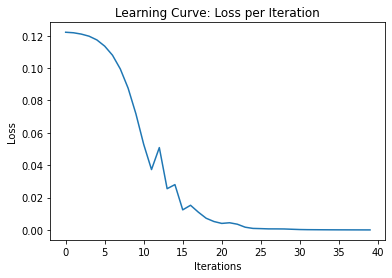

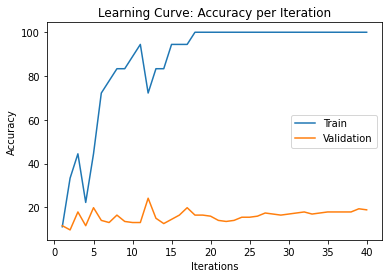

In [24]:
# Your code goes here
def sanity_check(model, train_data, valid_data):
    subset = torch.utils.data.Subset(train_data, get_indices(train_data))
    train(model, subset, valid_data, batch_size=18, num_epochs=40)

def get_indices(data):
    indices = []
    count = [0 for i in range(9)]
    for i in range(len(data)):
        if count[data[i][1]] < 2:
            indices.append(i)
            count[data[i][1]] += 1
        if sum(count) == 18:
          break
    return indices

cnnsanity = CNNModel()
sanity_check(cnnsanity, train_data, valid_data)

## Question 4. Training

### Part (a) -- 5 points

Train your first network on your training set.
Plot the training curve, and include your plot in your writeup.

Make sure that you are checkpointing frequently!

Epoch 1. Iter 22. [Val Acc 11.59%] [Train Acc 11.32%, Loss 2.1992781162261963]
Epoch 2. Iter 44. [Val Acc 38.16%] [Train Acc 38.06%, Loss 1.8860338926315308]
Epoch 3. Iter 66. [Val Acc 71.01%] [Train Acc 65.62%, Loss 1.3187212944030762]
Epoch 4. Iter 88. [Val Acc 66.67%] [Train Acc 70.26%, Loss 0.709120512008667]
Epoch 5. Iter 110. [Val Acc 74.4%] [Train Acc 78.31%, Loss 0.7584341764450073]
Epoch 6. Iter 132. [Val Acc 77.29%] [Train Acc 84.31%, Loss 0.6229347586631775]
Epoch 7. Iter 154. [Val Acc 79.71%] [Train Acc 85.81%, Loss 0.43099766969680786]
Epoch 8. Iter 176. [Val Acc 81.64%] [Train Acc 90.86%, Loss 0.2049618661403656]
Epoch 9. Iter 198. [Val Acc 78.74%] [Train Acc 91.54%, Loss 0.36036190390586853]
Epoch 10. Iter 220. [Val Acc 80.19%] [Train Acc 94.54%, Loss 0.35052889585494995]


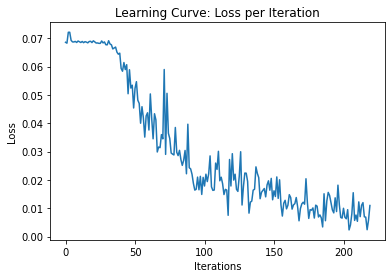

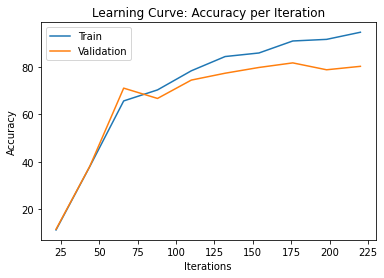

In [26]:
# Your code goes here. Make sure to include the training curve.
cnn = CNNModel()
path = "/content/gdrive/My Drive/Colab Notebooks/CSC413/A2/mlp/CNN/epoch-{}.pk"
train(cnn, train_data, valid_data, checkpoint_path=path)

### Part (b) -- 2 points

You should have tried several hyperparameter choices before deciding on one set
of hyperparameters to use for Part (a).
In this section, briefly explain the hyperparamter choices that you tried, 
and how they impacted your training.

**Explanation:**

- Learning rate is 0.001, it determines the step size for updating of our weights during the training process. Large number can overshoot optimal weight and cause instability so 0.001 is a good pick for us. If the number is too small, the learning speed would be too small and it would take more epochs to get the good results.
- Number of epochs is set to 10. Our dataset is visited 10 times. If we used a higher number of epochs, the model will be overfitted. We observed that on higher epochs, our model tend to have very high training accuracy, but the validation accuracy stagnates and plateau. Alternatively, if we used a lower number of epochs, the model may be underfitted. We concluded that at around 6-10 epochs, the model starts to look like it's being overfitted, so we set the number of epochs to 10. We also saved our weights after each epochs, so we can look at the accuracy reports made during training and pick the snapshot that is not overfitted or underfitted and we believe that this point will be between epoch 6-10, so setting number of epochs to 10 means that the snapshot will always be available to us.
- Our batch size is 32. Smaller batch size can lead to overfitting. With a batch size of 32 we have pretty much consistent results.
- We chose Adam for our optimizer because it resulted in faster training and better results.
- Please refer to Q2a for the choice of activation function.
- Please refer to Q2a for hidden layer/hidden unit.
- The choice of loss function here is cross entropy since we are doing a classification problem.
- We chose a kernel size of 3. We also tried kernel size of 5, but at times that took considerably more time to train the model. On top of taking more time than kernel size of 3, the results of kernel size 5 were also similar to the results of kernel size 3, so we decided to go with a kernel size of 3 since it seemed like it was reaching good results faster than kernel size of 5.
- For pooling, we decided on max pooling with size 2 and stride to as to not lose too much information compared to a larger max pooling size.

In [27]:
# Your explanation goes here.
# Explanation is in the markdown box above

### Part (c) -- 5 points

Train your second network on your training set.
Plot the training curve, and include your plot in your writeup.

Make sure that you are checkpointing frequently!

Epoch 1. Iter 22. [Val Acc 9.18%] [Train Acc 11.19%, Loss 2.1969399452209473]
Epoch 2. Iter 44. [Val Acc 23.19%] [Train Acc 20.33%, Loss 2.175999641418457]
Epoch 3. Iter 66. [Val Acc 36.23%] [Train Acc 35.74%, Loss 1.9582620859146118]
Epoch 4. Iter 88. [Val Acc 46.38%] [Train Acc 49.11%, Loss 1.8839589357376099]
Epoch 5. Iter 110. [Val Acc 68.12%] [Train Acc 66.85%, Loss 1.3573468923568726]
Epoch 6. Iter 132. [Val Acc 65.7%] [Train Acc 72.17%, Loss 1.9248703718185425]
Epoch 7. Iter 154. [Val Acc 72.95%] [Train Acc 78.04%, Loss 1.015030860900879]
Epoch 8. Iter 176. [Val Acc 74.88%] [Train Acc 79.67%, Loss 1.0361802577972412]
Epoch 9. Iter 198. [Val Acc 74.88%] [Train Acc 82.13%, Loss 1.2792634963989258]
Epoch 10. Iter 220. [Val Acc 71.5%] [Train Acc 81.99%, Loss 1.0525271892547607]


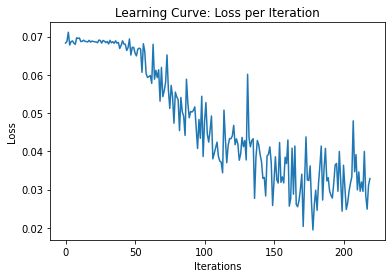

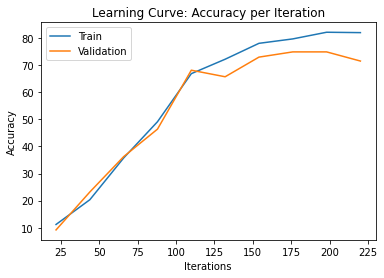

In [29]:
# Your code goes here. Make sure to include the training curve.
cnndrop = CNNModelDrop(dropout=0.5)
path = "/content/gdrive/My Drive/Colab Notebooks/CSC413/A2/mlp/CNNDrop/epoch-{}.pk"
train(cnndrop, train_data, valid_data, checkpoint_path=path)

### Part (d) -- 2 points

You should have tried several hyperparameter choices before deciding on one set
of hyperparameters to use for Part (c).
In this section, briefly explain the hyperparamter choices that you tried, 
and how they impacted your training.

**Explanation:**

Since our second network is a copy of the original cnn model with dropout layers, the choice of hyperparameters is the same as in section b). The only difference is that in this model we have dropout layers where a layer takes a float value between 0 and 1. During our training we have tested different droput values and came to the conclusion that default value of 0.5 would be optimal in dropout layers because smaller value of dropout was not preventing overfitting enough as we saw signs of overfitting at around 5-7 epochs.

In [30]:
# Your explanation goes here.
# Explanation is in the markdown box above.

### Part (e) -- 1 pts

Out of all the models (i.e. parts (a) vs (c), and the various hyperparameter choices)
that you tried, which model is the "best"?
If you were to select a single set of weight values (checkpoints)
to deploy and use in a real application, which would you choose?

**Explanation:**

We would choose the model from part (c) and its weight values at around epochs 8. This is because the model in part (a) seems like it might be overfitted from the stagnated and plateaued validation accuracy and its training accuracy that is in the high 90s. Although the accuracies with the model from part (a) looks better, the model from part (c) incorporates dropout layers and is less prone to overfitting and data memorization.

In [31]:
# Your explanation goes here.
# Explanation is in the markdown box above.

## Question 5. Transfer Learning

For many image classification tasks, it is generally not a good idea to train a
very large deep neural network model from scratch due to the enormous compute
requirements and lack of sufficient amounts of training data.

One of the better options is to try using an existing model that performs a
similar task to the one you need to solve. This method of using a
pre-trained network for other similar tasks is broadly termed
**Transfer Learning**. In this question, we will use Transfer Learning
to extract features from the hand gesture images. Then, train a smaller
network to use these features as input and classify the hand gestures.

As you have learned from the CNN lecture, the AlexNet architecture played a pivotal role in
establishing Deep Neural Nets as a go-to tool for image classification
problems and we will use an ImageNet pre-trained AlexNet model to
extract features in this assignment.

### Part (a)

Here is the code to load the AlexNet network, with pretrained weights.
When you first run the code, PyTorch will download the pretrained weights
from the internet.

In [32]:
import torchvision.models
alexnet = torchvision.models.alexnet(pretrained=True)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

The `alexnet` model is split up into two components: `alexnet.features` and 
`alexnet.classifier`.  The first neural network component, `alexnet.features`,
is used to
computed convolutional features, which is taken as input in `alexnet.classifier`.

The neural network `alexnet.features` expects an image tensor of shape
Nx3x224x224 as inputs and it will output a tensor of shape Nx256x6x6 . (N = batch size).

Here is an example code snippet showing how you can compute the AlexNet
features for some images (your actual code might be different):

In [33]:
img, label = train_data[0]
features = alexnet.features(img.unsqueeze(0)).detach()

Note that the `.detach()` at the end will be necessary in your code. The reason is that
PyTorch automatically builds computation graphs to be able to backpropagate
gradients. If we did not explicitly "detach" this tensor from the AlexNet portion
of the computation graph, PyTorch might try to backpropagate gradients to the AlexNet
weight and tune the AlexNet weights.

Compute the AlexNet features for each of your training, validation, and test data.
In other words, create three new arrays called `train_data_features`, `valid_data_features`
and `test_data_features`. Each of these arrays should contain tuples of the form 
`(alexnet_features, label)`

In [34]:
# Modify this code
def get_features(data):
  features_array = []
  for img, y in data:
    feature = alexnet.features(img.unsqueeze(0)).detach()  # compute the alex net features based on the image
    features_array.append((feature, y),)
  return features_array

train_data_new = get_features(train_data)
valid_data_new = get_features(valid_data)
test_data_new = get_features(test_data)

### Part (b)


Create a multi-layer preceptron that
takes **as input** these AlexNet features,
and makes a prediction. Your model should be a subclass of `nn.Module`.

In [35]:
class MLP(nn.Module):
    def __init__(self, num_hidden=100, vocab_size=9):
        super(MLP, self).__init__()
    
        self.fc_layer1 = nn.Linear(256 * 6 * 6, num_hidden)
        self.fc_layer2 = nn.Linear(num_hidden, vocab_size)

    def forward(self, x):
        x = x.view(-1, 256 * 6 * 6)
    
        layer1 = self.fc_layer1(x)
        relu1 = torch.relu(layer1)
        layer2 = self.fc_layer2(relu1)
        return layer2

### Part (c)

Train the `MLP()` model for at least 6 epochs, and report
on the maximum validation accuracy that you can attain.

This model should train *much* faster since it has very few parameters.
However, this model should attain much better accuracy much faster!

Epoch 1. Iter 22. [Val Acc 85.99%] [Train Acc 89.5%, Loss 0.38531506061553955]
Epoch 2. Iter 44. [Val Acc 89.86%] [Train Acc 98.77%, Loss 0.20978569984436035]
Epoch 3. Iter 66. [Val Acc 91.3%] [Train Acc 100.0%, Loss 0.05684439465403557]
Epoch 4. Iter 88. [Val Acc 93.24%] [Train Acc 100.0%, Loss 0.020899983122944832]
Epoch 5. Iter 110. [Val Acc 96.62%] [Train Acc 100.0%, Loss 0.00630138348788023]
Epoch 6. Iter 132. [Val Acc 97.1%] [Train Acc 100.0%, Loss 0.010869784280657768]


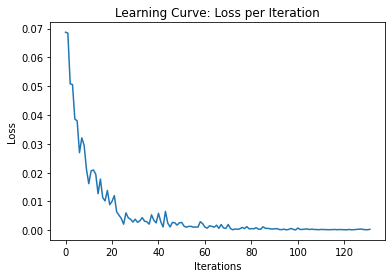

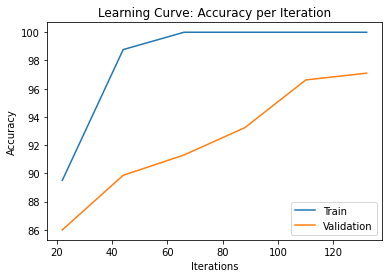

In [62]:
mlp = MLP()
train(mlp, train_data_new, valid_data_new, num_epochs=6)

## Question 6. Test Accuracy

### Part (a) -- 5 pts

Report the test accuracies of your **single best** model for the test set, including
any model that you trained (including in Q5).

In [63]:
# Write your code here. Make sure to include the test accuracy in your report
test_accuracy = round(get_accuracy(mlp, test_data_new) * 100, ndigits=2)
print("Test accuracy for the single best model({}): {}%".format("the transfer learning model from Q5", test_accuracy))

Test accuracy for the single best model(the transfer learning model from Q5): 83.86%


### Part (b) -- 1 pts

Display one image that your model correctly classified.

Predicted: 0, Label: 0


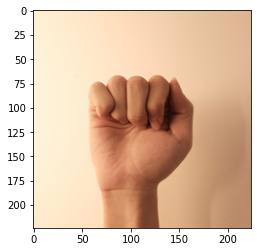

In [47]:
# Make sure both your code and image are visible to the TA
def get_images(model, data, original_imgs, correct=True):

    loader = torch.utils.data.DataLoader(data, batch_size=256)

    model.eval()

    images = []
    results = []
    for imgs, labels in loader:
        pred = model(imgs)
        pred = torch.argmax(pred, dim=1)
        if correct:
            compare = pred == labels
        else:
            compare = pred != labels
        indices = torch.nonzero(compare).squeeze()
        for index in indices:
            i = index.item()
            images.append(original_imgs[i][0])
            results.append((pred[i], labels[i]))
    
    return images, results

correct_imgs, results = get_images(mlp, data=test_data_new, original_imgs=test_data)
img = correct_imgs[0].permute(1, 2, 0)
print("Predicted: {}, Label: {}".format(results[0][0], results[0][1]))
plt.imshow(img)
plt.show()

### Part (b) -- 1 pts

Display one image that your model incorrectly classified. (If your test performance was 100%, please just say so.)

Predicted: 3, Label: 2


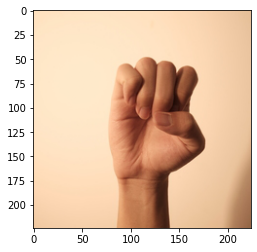

In [53]:
# Make sure both your code and image are visible to the TA
incorrect_imgs, results = get_images(mlp, data=test_data_new, original_imgs=test_data, correct=False)
img = incorrect_imgs[13].permute(1, 2, 0)
print("Predicted: {}, Label: {}".format(results[6][0], results[6][1]))
plt.imshow(img)
plt.show()

## Question 6. Adversarial Examples -- 2 pts

In this question you will take the trained model you selected in Q4 (e),
and you will freeze its weights (i.e. do not optimize it further). Let's call this model $f()$.
Select an image (let's call it $x$) from the test set, where $f(x)$ outputs the correct label $y$.
Then, compute an adversarial noise image (let's call it $n$) that you will add to $x$ in order to change
the original label to an incorrect one, i.e. $f(x + n) \neq f(x)$, while keeping the value of the noise
pixels small, i.e. $|n_{i,j}| < \epsilon$. You have control over $\epsilon$, but keep in mind that the
noise should be imperceptible to the human eye when not zooming into the image.

y prediction before applied noise: 0


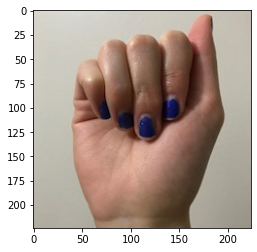

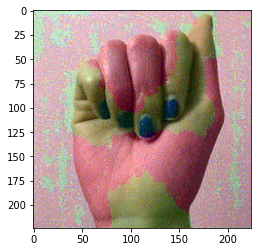

y prediction after applied noise: 2


In [54]:
#
# Make sure your code, original image x, and the corrupted image x + n are shown to the TA
# Show the output f(x) = y and the output f(x + n) is different than y.
#
def get_images_labels(model, data, original_imgs, correct=True):

    loader = torch.utils.data.DataLoader(data, batch_size=256)

    model.eval()

    images = []
    labels_arr = []
    for imgs, labels in loader:
        pred = model(imgs)
        pred = torch.argmax(pred, dim=1)
        if correct:
            compare = pred == labels
        else:
            compare = pred != labels
        indices = torch.nonzero(compare).squeeze()
        for index in indices:
            i = index.item()
            images.append(original_imgs[i][0])
            labels_arr.append(original_imgs[i][1])
    
    return images, labels_arr


# Before noise
results = get_images_labels(cnndrop, data=test_data, original_imgs=test_data, correct=True)
correct_imgs = results[0]
img = correct_imgs[0].permute(1, 2, 0)
label = results[1][0]
print('y prediction before applied noise: {}'.format(label))
plt.imshow(img)
plt.show()


original = results[0][0]
cnndrop.eval()

# Compute the gradient of the loss with respect to the original image
criterion = nn.CrossEntropyLoss()

original.requires_grad = True
pred = cnndrop(original)
loss = criterion(pred, torch.tensor([label]))
cnndrop.zero_grad()
loss.backward()
grad = original.grad.data

epsilon = 0.09

adversarial_image = original + epsilon * torch.sign(original.grad)
adversarial_image_np = adversarial_image.permute(1, 2, 0).detach().numpy()
plt.imshow(adversarial_image_np)
plt.show()


# Make new prediction
pred = cnndrop(adversarial_image)
pred = torch.argmax(pred, dim=1)
y_new = pred.item()
print('y prediction after applied noise: {}'.format(y_new))

## Question 7. Work Allocation -- 1 pts

This question is to make sure that if you are working with a partner, that
you and your partner contributed equally to the assignment.

Please have each team member write down the times that you worked on the
assignment, and your contribution to the assignment.

In [55]:
# Your answer goes here
# We did the whole assignment together on call which means that we went over through each question together. 
# This was done to make sure that we have equal contribution to the assignment as well as we equally learn, 
# practice and apply material in this particular assignment.